<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Kevin Reyes - Diego Quezada</H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

##### I) Partiremos cargando los datos. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files   #-> For Google Colab, there are other methods
import io
#uploaded = files.upload()
#header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
#df2 = pd.read_csv(io.BytesIO(uploaded['qsar_aquatic_toxicity.csv']),names=header_list,sep=";")
#header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
#df2 = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";", names=header_list)

In [6]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from tensorflow.python.keras.engine import input_layer

In [7]:
from keras.optimizers import SGD
from keras.callbacks import History 

In [8]:
import sys
sys.path.append('saved_model')
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.regularizers import l1,l2

# 2. Reconocimiento de lenguaje de señas

Una de las áreas donde las redes neuronales han obtenido desempeños decisivamente superiores al resto de los métodos existentes, al menos en su momento, es en el reconocimiento de imágenes. La capacidad de las redes convolucionaes de aprender y extraer patrones sobre patrones hasta obtener características de alto nivel, representativas de atributos de las imágenes, ha permitido desempeños superiores a los obtenidos por otros métodos de aprendizaje automático o inteligencia aritificial, e incluso en algunos casos al desempeño humano.

Una de las tareas usuales que se pueden resolver con redes neuronales convolucionales es la clasificación de imágenes. Para este punto nos basaremos en un dataset de lenguaje de señas, su descripción detallada se puede encontrar en https://www.kaggle.com/datamunge/sign-language-mnist (No es necesario descargar directamente el dataset si está usando _Colab_ como es sugerido)

<h1 align='center'> <img src="https://i1.wp.com/25.media.tumblr.com/tumblr_mdcs1cF4nn1ri2o31o1_1280.png" width="100%" height="30%" /> </h1>


Note que el entrenamiento de redes convolucionales se beneficia particularmente del uso de unidades de procesamiento gráfico, por lo cual podría ser recomendable utilizarlas en caso de disponer, o considerar correr los codigos completos una vez verificado su funcionamiento en una sesión de Collab acelerada por GPU, entre otras opciones de GPU en la nube existentes.

## 2.a Carga de datos y visualizaciones

##### I) Iniciaremos cargando los datos. Para esto necesitará crear una cuenta en kaggle, dirigirse a su perfil, ir a Account, y en la sección API apretar _Create new API token_ , se descargará un archivo kaggle.json, ábralo como archivo de texto y obtenga su username y key. Luego ejecute el siguiente código (desconozco por qué pero a veces hay que ejecutar el código 2 veces para que funcione). Solución obtenida desde el hilo: https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27

In [9]:
#username="kevinreyesvsquez"
#key="534bbcefe69bc6ab1c27708ae73e7627"
#!pip install -q kaggle
#api_token = {"username":username,"key":key}
#import json
#import zipfile
#import os
#os.environ['KAGGLE_USERNAME'] = str(username)
#os.environ['KAGGLE_KEY'] = str(key)
#!kaggle datasets download --force -d datamunge/sign-language-mnist ## agregué -force
#if not os.path.exists("/content/competitions/data_sign"):
#    os.makedirs("/content/competitions/data_sign")
#os.chdir('/content/competitions/data_sign')
#if not os.path.exists("/datamunge/sign-language-mnist"):
#    os.makedirs("/datamunge/sign-language-mnist")
#os.chdir('/datamunge/sign-language-mnist')
#for file in os.listdir():
#    if file[-4:]==".zip":
#      zip_ref = zipfile.ZipFile(file, 'r')
#      zip_ref.extractall()
#      zip_ref.close()
#!ls

Si en el siguiente código obtiene error de directorio ejecutar de nuevo celda superior

In [46]:
import pandas as pd
import numpy as np
df_tr=pd.read_csv("sign_mnist_train.csv")
X_tmp1 = df_tr.values[:,1:]
X_tmp=df_tr.values[:,1:].reshape(-1,28,28,1)
Y_tmp=df_tr.values[:,:1]
df_tst=pd.read_csv("sign_mnist_test.csv")
X_tst=df_tst.values[:,1:].reshape(-1,28,28,1)
Y_tst=df_tst.values[:,:1]

In [11]:
df_tr["label"].value_counts()

17    727
16    718
22    689
11    688
18    684
19    679
3     679
8     672
14    672
5     670
2     668
23    663
20    656
13    649
0     638
10    636
6     629
24    627
15    614
21    609
1     586
12    570
7     568
4     563
Name: label, dtype: int64

In [12]:
#Breve análisis
print(X_tmp1.shape)
print(Y_tmp.shape)

(15554, 784)
(15554, 1)


Para evitar largos tiempos de entrenamiento y hacer más desafiante el problema, sacrificaremos data de entrenamiento. **Ejectuar el siguiente código**. Mantendremos el tamaño del conjunto de test.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sf=StratifiedShuffleSplit(n_splits=1, test_size=2000, random_state=0)
for smaller_index,data_index in sf.split(X_tmp, Y_tmp): # en realidad este método está pensado para hacer cross-validation con clases balanceadas,
                                                                        # ahora lo ocupamos solamente para extraer 1200 observaciones manteniendo la proporción de clases
                                                                          # del dataset original
    x_tmp=X_tmp[data_index]
    y_tmp=Y_tmp[data_index]

In [14]:
#np.where(y_tmp[:,0]==10)[0][0]
print(type(y_tmp))

<class 'numpy.ndarray'>


##### II) **Visualice** algunas imágenes de cada una de las catégorias junto con sus nombres. 

**Preguntas:** ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Por qué hay letras omitidas (inferir viendo abecedario de lenguaje de señas americano)? ¿Las categorías están balanceada? ¿Cuántos canales están disponibles?

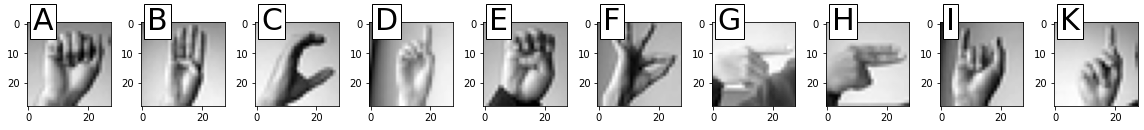

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,4]
letters=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"] # Missing J, Z
fig, axs = plt.subplots(1,10)
#print(list(enumerate(axs)))
for i,ax in enumerate(axs):
  if i>=9: # debido a la falta de J
    i+=1
  #print(i)
  ax.imshow(x_tmp[np.where(y_tmp[:,0]==i)[0][0],:,:,0], cmap = "gray")
  if i>=9:
    i-=1
  ax.text(1.5, 2.2, letters[i], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()

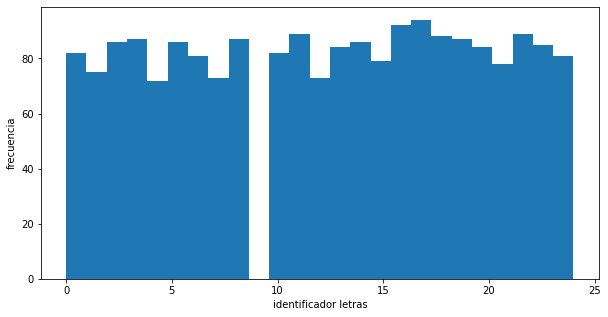

In [48]:
plt.rcParams["figure.figsize"]=[10,5]
plt.hist(y_tmp[:], bins=25)
plt.xlabel("identificador letras")
plt.ylabel("frecuencia")
plt.show()

**Respuestas:**

Analizando el dataset obtenemos que algunos pares problemáticos son A-E, G-H, S-M, M-N.

Ni la J ni la Z está en el dataset pues para expresar estas letras en lenguaje de señas es necesario realizar un movimiento con la mano que es imposible representar mediante una foto. 

Considerando que no hay Js ni Zs en la muestra, las categorias presentes están balanceadas como se observa en el histograma anterior.

Solamente estamos trabajando con un canal, pues estamos trabajando con imágenes en blanco y negro.


## 2.b Preprocesamiento

Conforme el conjunto en entrenamiento y validacion a partir de x_tmp e y_tmp con proporciones de 80% y 20% respectivamente, preocúpese de que los conjuntos de entrnamiento y validación mantengan la proporción (aprox.) para cada clase (mantener equilibrio de clases), inspírese en el código utilizado para reducir la cantidad de datos (sección 2.a). Transforme la escala de las imágenes, de $[0,255]$ a $[-1,1]$. Utilice la función `get_dummies` de pandas para transformar $y$ a _encodding_ _one hot vector_. 

**Preguntas:**
¿Perdemos información con este preprocesamiento? ¿Qué representa cada uno de los valores de la tupla `x_tr.shape`? 

¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma? ¿Por qué? 

¿Cómo se transforma el `.shape` de $y$?

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit # <- suggestion
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
x_tr, x_tst, y_tr, y_tst  = train_test_split(x_tmp, y_tmp, test_size=0.1, shuffle=True) # si hay resultados raros, corroborar que se mantiene el equilibrio de clases
x_tr, x_val, y_tr, y_val  = train_test_split(x_tr, y_tr, test_size=0.2, shuffle=True) # si hay resultados raros, corroborar que se mantiene el equilibrio de clases

x_tr = x_tr/127.5 - 1
x_val = x_val/127.5 - 1
x_tst = x_tst/127.5 - 1

y_tr = pd.get_dummies(y_tr[:,0],len(letters)).values
y_val = pd.get_dummies(y_val[:,0],len(letters)).values
y_tst = pd.get_dummies(y_tst[:,0],len(letters)).values

In [18]:
print(x_tr.shape)
print(y_tr.shape)

(1440, 28, 28, 1)
(1440, 24)


Si almacenamos el valor con el escalamos la data podemos volver a la data original sin problemas, por lo que no perdemos datos. La tupla de x_tr.shape es de la forma (número imágeness, dimensión filas, dimensión columnas, canal), donde en este caso canal = 1 pues son imágenes en blanco y negro.

No, ya que, cada valor de y se debe tratar como un identificador de una clase, no como la representación matemática de una cantidad, debemos transformar el y a un one hot vector, el cual realiza una binarización de las clases, es decir, mediante columnas que representan cada clase, en caso de que una clase corresponda para una fila esto se indica con un 1, en caso contrario 0. Esta transformación se realiza, ya que, los algoritmos de aprendizaje tienden a pensar que los valroes más altos para categorización numérica son mejores, también podrían suceder problemas como que el modelo calcule internamente el promedio entre dos clases, por ejemplo el promedio entre 4="e" y 2="c" y de como resultado 3="d".

Como se indico previamente, el nuevo shape de y tiene 24 columnas, donde cada una representa un valor booleano de 0 o 1 para una clase específica.

## 2.c Primera red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero la red siguiendo la estructura $C\times P\times C\times P \times D$ donde $C$ representa una capa convolucional, $P$ una capa de _Max pooling_ y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa _Flatten_ que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa. 

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3\times 3$, stride por default, y _padding 'same'_ (es decir agregaremos 0 a los bordes de la imágen de tal manera que se preserve la dimiensión de la imágen al atravesar la capa; y las capas de _pooling_ tendrán tamaño y _stride_ $2\times 2$, como muestra el código. **Note que a diferencia de la pregunta 1 aprovecharemos al máximo el lenguaje high-level keras.**

Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa (note que cómo en la primera capa especificamos el `input_shape` podemos llamar el método antes de compilar el modelo o de pasarle datos. **Justifique** el número parámetros y el _Output Shape_ de cada capa en función de la estructura de la red y lo aprendido en clases. 

**Preguntas:**

¿Por qué la capa de salida debe tener 24 neuronas? ¿Qué operación efectúa la activación _SoftMax_? ¿Qué representaría en terminos del problema el vector de salida de la red?

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

#Primera capa C x P
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa C x P 
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa flatten y D
model.add(Flatten())    
model.add(Dense(units=24, activation='softmax')) # output

    
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                150552    
Total params: 299,416
Trainable params: 299,416
Non-trainable params: 0
__________________________________________________

**Respuesta:**
La capa da salida debe tener 24 neuronas porque es un problema de clasificación de 24 clases, cada neurona i indicará la probabilidad que la imagen analizada pertenezca a la clase i. Se utiliza una función softmax para que las probabilidades de las 24 neuronas de salida sumen 1, es decir efectúa una **normalización**

## 2.d Primer entrenamiento

##### I) Compile la red definida en el item anterior. Para esta pregunta puede usar los optimizadores configurados por defecto, y debe usar como _loss_ _Categorical Crossentropy_.

Entrene la red hasta observar convergencia recuperando su `history`. Grafique como varia el _accuracy_ en entrenamiento y validación a lo largo del aprendizaje. Adicionalmente calcule el accuracy para todo el conjunto de test. Mida igualmente el _categorical accuracy_ como se muestra en el código.  
**Recordar usar entorno GPU en _Colab_**

**Preguntas:**

¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema? ¿Qué valor representa el _accuracy_? ¿Le parece buena medida de desempeño para este problema? ¿Por qué luego de lograr un accuracy de 100% en el conj. de entrenamiento siguen actualizándose los pesos de la red? ¿A qué corresponde cada valor de la lista que retorna model.evaluate?

**Respuestas:**

a. Sabemos que cuando se utiliza MSE se asume que los errores siguen una distribución normal mientras que cuando se utiliza categorical crossentropy se asume que los errores sigue una **distribución multinomial**, así, la elección de la categorical crossentropy está justificada matemáticamente debido a el modelo probablístico con el que estamos trabajando. Además al utilizar MSE junto a una función de activación softmax en la última capa puede ser problemático pues en el entrenamiento buscaremos hacer cero o uno el output de las neuronas perteneciente a esta capa y debido la derivada de esta función y al backpropagation el aprendizaje se puede hacer lento.

b. El porcentaje de ejemplos correctamente clasificados.

c. No, ya que, no estamos considerando que tan precisa es la clasificación de los valores, por ejemplo: para cierto ejemplo que pertenece a la clase i, podríamos con un modelo clasificarla correctamente con un valor de probabilidad de 0.51% mientras que con otro modelo con un valor de probabilidad de 0.99%, el accuracy nos daría el mismo valor, sin embargo, si nos vamos al detalle el segundo modelo es mejor que el otro.

d. Luego de obtener 100% de accuracy el entrenamiento continúa pues hemos establecido realizar un entrenamiento con una cantidad fija de epochs, además no estamos utilizando early stopping.

e. Es una lista de la forma (test loss, test accuracy)


In [20]:
print(y_val.shape)

(360, 24)


In [21]:
from keras.callbacks import History, EarlyStopping

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [22]:
acc_tst = model.evaluate(x_tst, y_tst, verbose=0)


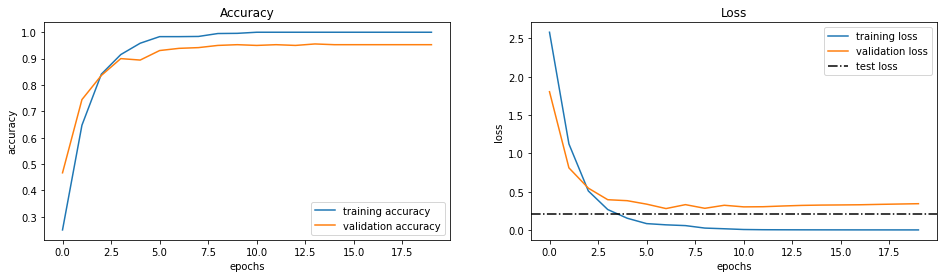

In [23]:
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label = "training accuracy")
plt.plot(history.history["val_acc"], label = "validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss")
plt.axhline(y=acc_tst[0],color="k",linestyle="-.",label="test loss")
plt.legend()
plt.show()

Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

Para mayor información: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=sI1YvCDFzpl3

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [24]:
import tensorflow as tf
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[False, False, False, False, False, False]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [25]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[True, True, True, True, True, True]

---> Procederemos a guardar el modelo

In [26]:
import sys
sys.path.append('saved_model')
model.save('saved_model/2_b')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/2_b/assets


---> Verificamos

In [27]:
model_new=tf.keras.models.load_model('saved_model/2_b') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

[True, True, True, True, True, True]

## 2.e Bloque $C\times C\times P$

Una práctica usual en redes convolucionales es apilar más de un filtro convolucional antes de aplicar _pooling_. La idea detras de esto es darle más "espacio" a la red para aprender los patrones relevantes antes de realizar el subsampleo mediante _pooling_. En el caso de este _dataset_ también nos permite agregar más capas convolucionales sin reducir tan fuertemente la dimensión de las imagenes filtradas. Incluso muchos investigadores optan por agregar más de una capa densa el final de la red, para dar aún más libertad al modelo, pues las restricciones impuestas sobre los parámetros por la estructura convolucional parecieran restringir lo suficiente al modelo, más libertad en las capas finales no pareciera implicar un _overfitting_ tan fuerte como sería por ejemplo en una red _Fully Connected_.

**Cree y entrene** una red, utilizando **dos bloques** de dos capas convolucionales y una de _maxpool_ y luego dos capas densas, es decir $C\times C\times P \times C\times C\times P\times D \times D$. Utilice $128$ filtros $3\times 3$ en las dos primeras convolucionales y $64$ filtros $3\times 3$ en las dos siguientes. Para ambas capas de _maxpool_ utilice tamaño y _stride_ $2\times 2$. 

**Comente** como se compara el desempeño con las redes anteriores. Apóyese de gráficos y valores numéricos. 

In [28]:
model_2 = Sequential()

model_2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))

model_2.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',))

model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))

model_2.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Flatten()) 
model_2.add(Dense(units=100, activation='tanh'))
model_2.add(Dense(units=24, activation='softmax'))

    
# summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [29]:
from keras.callbacks import History, EarlyStopping

my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history_2 = model_2.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

In [30]:
acc_tst_2 = model_2.evaluate(x_tst, y_tst, verbose=0)

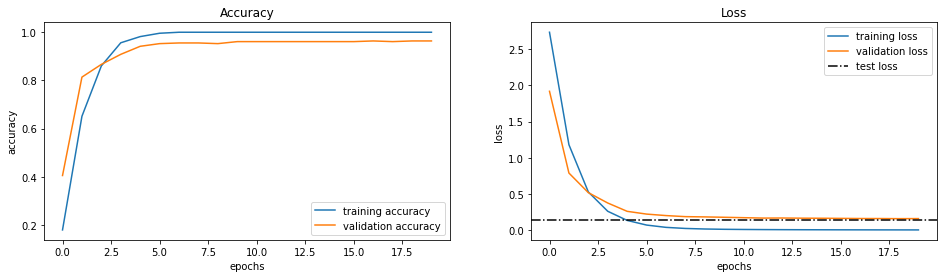

In [31]:
plt.subplot(1,2,1)
plt.plot(history_2.history["acc"], label = "training accuracy")
plt.plot(history_2.history["val_acc"], label = "validation accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(history_2.history["loss"], label = "training loss")
plt.plot(history_2.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss")
plt.axhline(y=acc_tst_2[0],color="k",linestyle="-.",label="test loss")
plt.legend()
plt.show()

## 2.f Exploración de profundidad

Por comodidad preferiremos quedarnos con la estructura en bloques del item anterior. En esta pregunta deberán explorar qué ocurre a medida uno cambia la profundidad de la red. Para esto, entrene redes con distintos números de bloques. Debe a lo menos entrenar una red por cada número de bloques entre 1 y 5 bloques (**¿Qué particularidad tiene la red con 5 bloques? ¿Puede entrenar una más profunda?**). También entrenar una red con "0" bloques, es decir una red densa como las de la pregunta 1. 

Comente sobre los casos extremos (0 bloques y 5 bloques), ya sea a partir de lo aprendido en clases o lo que observa al momento de entrenar las redes. **¿Le parece que alguno de los dos sea buena aproximación para reconocimiento de imágenes?** Para cada red recupere `history` y grafique el valor del mejor _accuracy_ en validación y el _accuracy_ sobre entrenamiento en el mismo _epoch_ en función de la profundidad de la red, similar al procedimiento realizado en 1.c.

Quedan a su discreción los parámetros de cada capa convolucional, puede utilizar el número de filtros que estime convenientes, utilice _stride_ por default, y en caso de utilizar alguna regla para el número de filtros, que tal regla sea la misma para todas las profundidades (pueden ver dos posibles ejemplos en el código propuesto abajo). Para las capas de _MaxPool_ utilicen las que aparecen en el código.

Para ahorrar tiempo, si observa que una red no converge, puede detener anticipadamente el entrenamiento. Para esto es recomendable usar el _Callback_ de keras `EarlyStopping` el cual deben agregar al momento de utilizar el método `.fit` (ejemplo similar en pregunta 1 y pregunta 2.d), sin embargo asegúrese de ponerle _patience_ de a lo menos 10, pues como podrá observar algunas redes empeoran su desempeño en algunas _epochs_ para luego seguir mejorando. Puede elegir monitorear la métrica que estime conveniente para esta pregunta. 


In [32]:
histories = []
for block_num in range(5): #28 14 7 3 1 

    model = Sequential()
    # create model

    for i in range(block_num):
        
        model.add(Conv2D(filters = 256, kernel_size = (3,3),padding='same',activation='relu'))
        model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # or for instance

        #model.add(Conv2D(filters = int(128/(i+2)), kernel_size = (3,3),padding='same',activation='relu'))
        #model.add(Conv2D(filters = int(128/(i+2)), kernel_size = (3,3), padding='same', activation='relu'))
        #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # flatten
    model.add(Flatten()) 
    # dense's
    model.add(Dense(units=24, activation='softmax'))
    # compile
    my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=10,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    # train and save results
    history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
    histories.append(history)

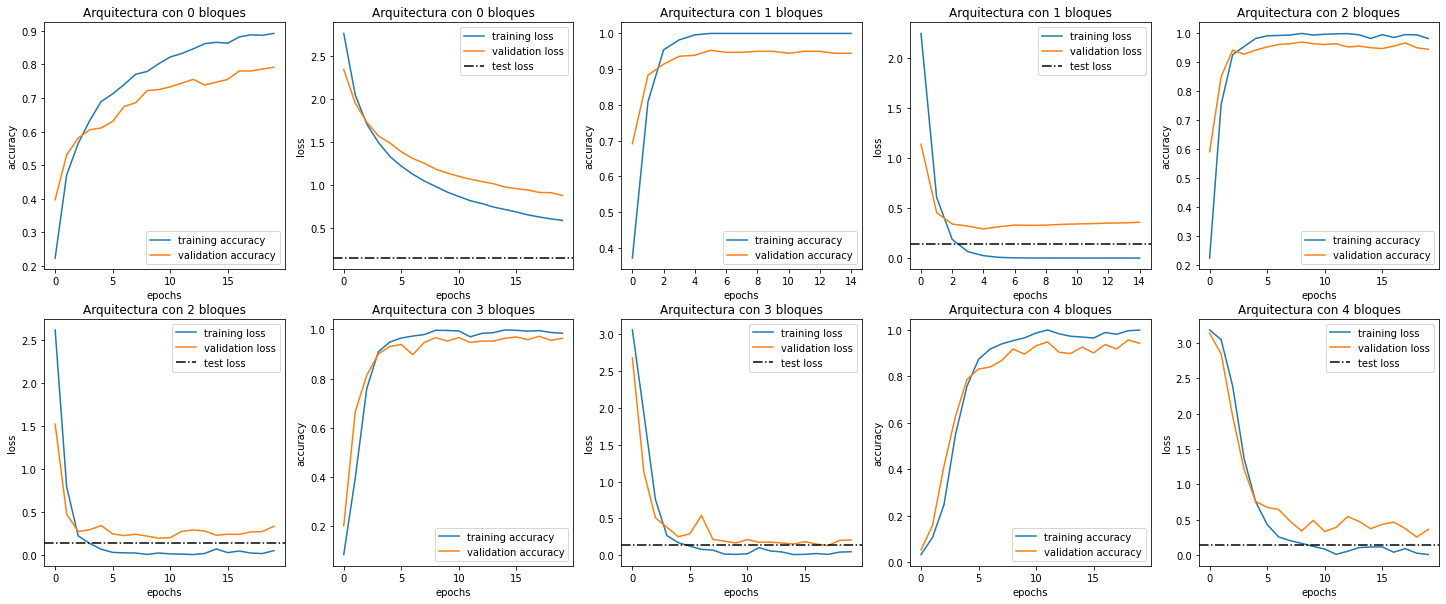

In [44]:
plt.rcParams['figure.figsize']=[25,10]
for i,history in enumerate(histories): #0 1 2 3 4
    plt.subplot(2,5,2*i + 1)
    plt.title(f"Arquitectura con {i} bloques")
    plt.plot(history.history["acc"], label = "training accuracy")
    plt.plot(history.history["val_acc"], label = "validation accuracy")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.subplot(2,5,2*i + 2)
    plt.title(f"Arquitectura con {i} bloques")
    plt.plot(history.history["loss"], label = "training loss")
    plt.plot(history.history["val_loss"], label = "validation loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.axhline(y=acc_tst_2[0],color="k",linestyle="-.",label="test loss")
    plt.legend()
plt.show()

### Respuesta

1. ¿Qué particularidad tiene la red con 4 bloques? ¿Puede entrenar una más profunda?  
En nuestros bloques, para cada bloque el tamaño de los filtros extraídos de la imágenes originales de tamaño 28 se reduce a la mitad. Para un bloque el tamaño al final del bloque queda en 14, para 2 bloques -> 7, 3 bloques -> 3, 4 bloques -> 1, es decir la particularidad de la red al tener 4 bloques es que terminamos trabajando con imágenes de 1 pixel, notar que esto puede ser muy problemático. Al tener 5 bloques cuando se intenta hacer el  MaxPooling con la imagen de 1 pixel obtenemos error de dimensiones, ya que, no podemos reducir esta dimensión, por lo tanto, ya al tener 5 bloques la red falla, esto a su vez implica que para un número de bloques >= 5 la red fallará para imágenes de entrada de tamaño 28. Esto se comprueba cuando aumentamos el tamaño del pool, ya que, el tamaño de la imagen se reduce más en cada capa, aceptando un número menor de bloques.

2. ¿Le parece que alguno de los dos sea buena aproximación para reconocimiento de imágenes?  
Con 0 bloques notamos que nuestra red no aplica filtros ni maxpoolings, de forma que la red no logra captar aquellos aspectos relevantes de la imágen y aprenderlos. Por el contrario, para 4 bloques el problema es que la red termina analizando en detalle pixel a pixel, de forma que se pierde la gran ventaja de las redes convolucionales y su forma de manejar y resumir la data estadísticamente. En base a lo expuesto, consideramos que ninguno de los modelos es una buena aproximación para el reconocimiento de imágenes, esto pues el modelo con 0 bloques no toma en cuenta la relación espacial entre los pixeles y el modelo con 4 bloques termina trabajando con imágenes de un pixel, lo cual puede afectar fuertemente las predicciones de nuestro modelo.

## 2.g Exploración libre

Como probablemente ya habrán notado, la cantidad de hiperparámetros que se pueden fijar y explorar en una red convolucional es enorme. A parte de poder modificar la arquitectura de la red y su tamaño o profundidad, pueden en cada una de las capas modificar el número de filtros, el tamaño de los filtros; modificar _stride_, cambiar las activaciones, cambiar el _padding_, cambiar los tamaños de los _MaxPool_ o sus _strides_ o incluso modificar las capas densas al final de la red. 

Por motivos de tiempo y con la esperanza de que la tarea no sea más tediosa de lo necesario, en vez de pedir explorar cada uno de estos parámetros, se les propone elegir una exploración de la siguiente lista. Debe realizar la exploración exahustivamente, comentar sus resultados apoyándose de gráficos y su conocimiento teórico cuando sea apropiado. Independiente de la exploración elegida debe responder las preguntas finales. 

Para todas las exploraciones utilice como _template_ la mejor red entrenada hasta ahora y modifique el parámetro relevante. Si utiliza otra red, justifique brévemente su elección. 

**Exploraciones posibles (Elija 1)**
* Tamaño de los filtros: Manteniendo el filtro cuadrado, explore cambiar el tamaño de filtro de alguna(s) capas convolucionales. Debe explorar a lo menos valores de $1\times 1$ hasta $9\times 9$, por lo cual debe asegurarse realizar la exploración en una capa donde las dimensiones de los filtros de la capa anterior (o el Input de la capa) se lo permita. 
* Exploración del número de filtros: Explore variando el número de filtros de alguna(s) capas. Se recomienda explorar en potencias de 2, y debe explorar a lo menos 10 valores distintos.
* Neuronas capa Densa: realice una exploración del número de neuronas de alguna o ambas de las capas densas. Debe explorar a lo menos 10 combinaciones distintas. Puede dejar una de las dos capas fijas y variar la otra siguiendo potencias de 2 por ejemplo. Tenga cuidado con la explosión del número de parámetros. 
* Pooling: Pruebe cambiar el tamaño de los _MaxPool_ entre $2\times 2$ a $6\times 6$. Pruebe también cambiando todas las capas por `AveragePooling2D`, realizando la misma exploración que con _MaxPool_.
* Pooling "convolucional": Una aproximación posible para reemplazar las capas de _maxpool_ es utilizando capas convolucionales con kernel $2\times 2$ y _stride_ $2\times 2$. Pruebe reemplazando las capas _maxpool_ por este tipo de capas, luego pruebe una mezcla de ambas, luego pruebe simplemente eliminando las capas de _pooling_ y agregandole _stride_ a la segunda capa de cada bloque (con _kernel size_ $2\times 2$ y $3 \times 3$). Pruebe finalmente cambiando las funciones de activación de las capas donde se realiza la disminución de dimensión, probando a lo menos activación lineal, sigmoidea y tangente hiperbólica.

**Preguntas (responder todas)**:
* ¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?

  **Respuesta:** Al utilizar un tamaño de kernel (1,1) tenemos que al aplicar un filtro a una imagen se irá escalando el valor de los pixeles desde la imagen input a la imagen ouput. En el caso de un stride = 1 obtendremos exactamente la misma imagen pero con el valor de los pixeles escalados por un valor correspondiente al único en la matriz del filtro.
* ¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?  

  **Respuesta:** Al cambiar el número de filtros de una capa modificamos la cantidad de imagenes totales extraídas de una imagen de entrada, cada uno de estas imágenes generadas por la aplicación de cada filtro genera una extracción de alguna feature de la imagen original la cual alimenta a la capa siguiente, por esto que aumenta el número de parámetros al aumentar la cantidad de filtros.
* ¿En su opinión, qué metodo resume mejor la información de una capa, _maxpool_ o _averagepool_?

  **Respuesta:** El mejor método de pooling dependerá siempre de la data que se esté analizando, sin embargo generalmente podemos mencionar que **maxpooling extrae los features más importantes** (como los bordes por ejemplo), mientras que el averagepooling provee una imagen suave y que en algunos casos aporta mucho ruido pues considerará todos los pixeles aún cuando algunos de ellos no sean importantes de aprender.
* ¿Qué tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)
  
  **Respuesta:** Esperaría que con patrones no cuadrados se podrían extraer mejor patrones no cuadrados, por ejemplo, para un kernel de $3\times 2$ ($height\times width$) podríamos detectar más facilmente contornos u objetos alargados, lineas vérticales, etcétera. En cambio para un kernel $1\times 3$ Podríamos detener con mayor facilidad objetos o contornos horizontales.

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

histories_3 = []
#n_filtros = 128
filtros = [2,4,8,16,32,64,128,256,512,1024]
for n_filtros in filtros:
    model_3 = Sequential()

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',))

    model_3.add(MaxPooling2D(pool_size=(2, 2)))

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu'))

    model_3.add(MaxPooling2D(pool_size=(2, 2)))

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))

    model_3.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu'))

    model_3.add(MaxPooling2D(pool_size=(2, 2)))


    model_3.add(Flatten()) 
    model_3.add(Dense(units=110, activation='tanh'))
    model_3.add(Dense(units=24, activation='softmax'))

    my_callbacks = [History(), # Returns validation and training loss
    EarlyStopping(patience=10,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

    model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    # train and save results
    history_3 = model_3.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
    histories_3.append(history_3)

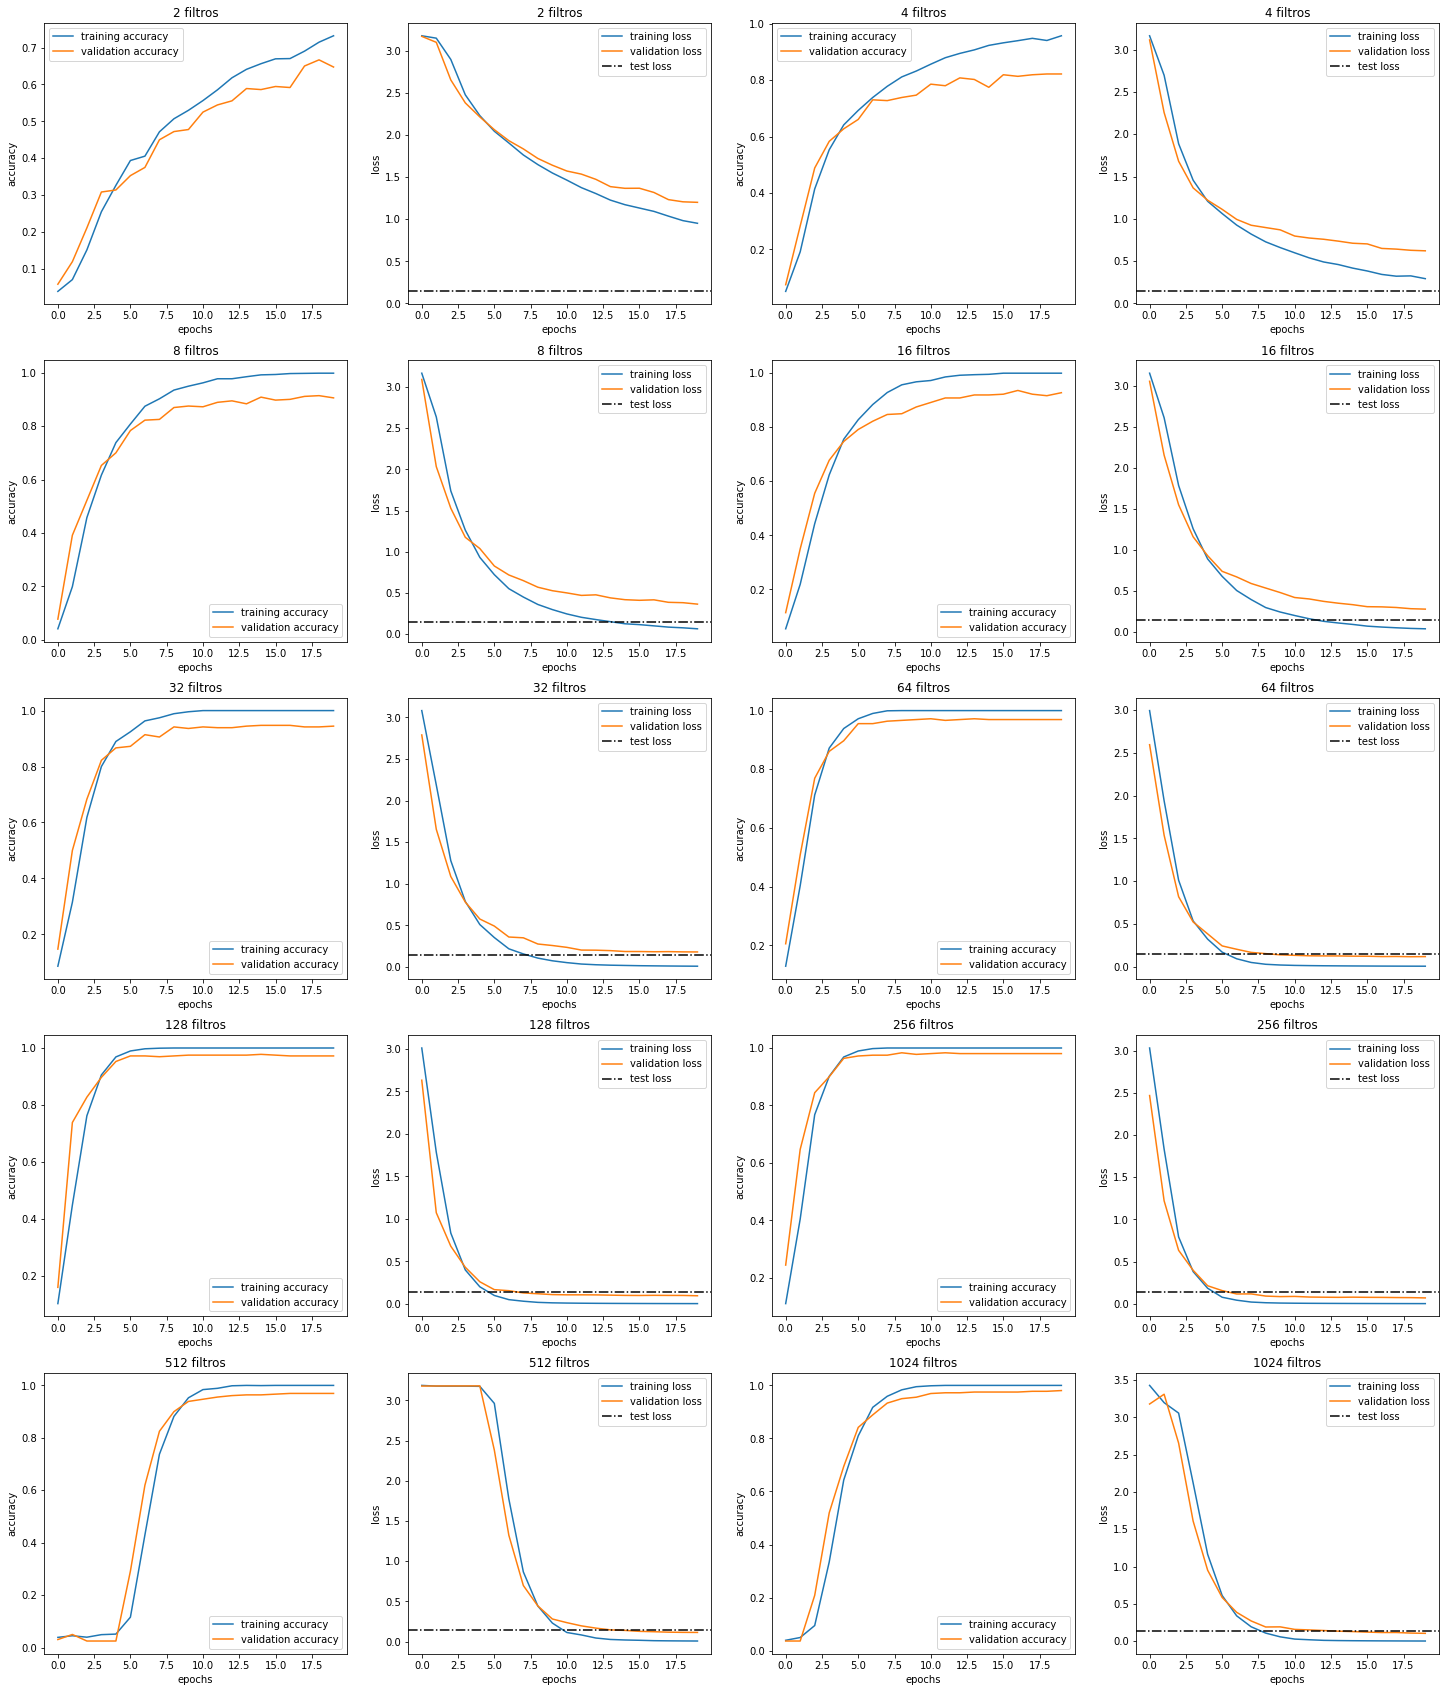

In [35]:
plt.rcParams['figure.figsize']=[25,30]
for i,history in enumerate(histories_3): #0 1 2 3 4
    plt.subplot(5,4,2*i + 1)
    plt.plot(history.history["acc"], label = "training accuracy")
    plt.plot(history.history["val_acc"], label = "validation accuracy")
    plt.title(f'{filtros[i]} filtros')
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.subplot(5,4,2*i + 2)
    plt.plot(history.history["loss"], label = "training loss")
    plt.plot(history.history["val_loss"], label = "validation loss")
    plt.title(f'{filtros[i]} filtros')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.axhline(y=acc_tst_2[0],color="k",linestyle="-.",label="test loss")
    plt.legend()
plt.show()

## 2.h Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucionar es usar aumentación de datos (Ignore el hecho de que botamos datos al inicio). La idea detrás de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, _etc_.

Keras trae implementado un generador de imagenes aumentadas, puede basarse en el código abajo para utilizarlo, aunque si lo desea o estima conveniente puede cambiar alguno de los parámetros. Entrene a completitud la mejor red que obtuvo a lo largo de toda la tarea.

**Pregunta:** 

¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos?  
**Respuesta:** Hay una mejora mínima de la red, sin embargo, se estima que para rotaciones pequeñas la capacidad de generalización del modelo podría aumentar, ya que, en general en un contexto real las personas no pondrán sus manos de forma exacta frente a la cámara ni perfectamente alineadas con una linea perpendicular al piso, por lo que, pequeñas rotaciones podrían ayudar a reconocer de forma eficaz estas señas con pequeñas variaciones, sin embargo, si las rotaciones aplicadas son muy grandes podríamos tener problemas con confusión de algunos de los simbolos, por ejemplo: la letra D podría confundirse con la letra P.

Basándose en el abecedario de lenguaje de señas que disponemos, ¿Cree que resultará beneficioso o contraproducente realizar _flips_ horizontales y/o verticales?

**Respuesta:** Para ambos casos sería **contraproducente** para el modelo, explicaremos el porqué analizando los símbolos para las letras D e I. Para ambas letras el modelo aprenderá que un dedo va hacia arriba, pero si hacemos un flip horizontal a imágenes asociadas a estas letras entonces obtendremos imágenes con el dedo hacia abajo, por lo que ese feature no será claro de aprender y confundirá al modelo. Notamos que para flips verticales pasa algo similar para las letras como la G y H, además al hacer un flip vertical al símbolo de la letra D obtendremos el símbolo de la letra I por lo que este flip podría generar un aprendizaje inexacto llevando a errores en nuevas clasificaciones.

In [36]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_tr)

###
n_filtros = 128
model_4 = Sequential()
model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))
model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',))

model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))

model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu'))

model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=x_tr.shape[1:]))

model_4.add(Conv2D(filters=n_filtros,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu'))

model_4.add(MaxPooling2D(pool_size=(2, 2)))


model_4.add(Flatten()) 
model_4.add(Dense(units=110, activation='tanh'))
model_4.add(Dense(units=24, activation='softmax'))

my_callbacks = [History(), # Returns validation and training loss
EarlyStopping(patience=10,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                     restore_best_weights=True)]

model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
###

history = model_4.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[EarlyStopping(patience=5)],
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
45/45 - 1s - loss: 2.9640 - acc: 0.1125 - val_loss: 2.5699 - val_acc: 0.2083
Epoch 2/50
45/45 - 1s - loss: 2.2059 - acc: 0.2979 - val_loss: 1.4644 - val_acc: 0.5889
Epoch 3/50
45/45 - 1s - loss: 1.5772 - acc: 0.5160 - val_loss: 0.9301 - val_acc: 0.7167
Epoch 4/50
45/45 - 1s - loss: 1.1080 - acc: 0.6521 - val_loss: 0.7324 - val_acc: 0.8000
Epoch 5/50
45/45 - 1s - loss: 0.7847 - acc: 0.7507 - val_loss: 0.4642 - val_acc: 0.8833
Epoch 6/50
45/45 - 1s - loss: 0.6230 - acc: 0.8271 - val_loss: 0.3711 - val_acc: 0.8833
Epoch 7/50
45/45 - 1s - loss: 0.4568 - acc: 0.8618 - val_loss: 0.2450 - val_acc: 0.9333
Epoch 8/50
45/45 - 1s - loss: 0.3920 - acc: 0.8924 - val_loss: 0.2102 - val_acc: 0.9389
Epoch 9/50
45/45 - 1s - loss: 0.3075 - acc: 0.9167 - val_loss: 0.1484 - val_acc: 0.9639
Epoch 10/50
45/45 - 1s - loss: 0.2715 - acc: 0.9243 - val_loss: 0.1804 - val_acc: 0.9500
Epoch 11/50
45/45 - 1s - loss: 0.1935 - acc

## 2.i Matriz de Confusión

Si bien el _accuracy_ nos ha acompañado toda la pregunta para evaluar el desempeño de nuestras redes de forma fácilmente interpretable, no considera por ejemplo si una gran parte de los errores provienen de una sola clase, o si alguna clase se logra clasificar perfectamente. Una manera de visualizar fácilmente esta métrica más granular, es utilizando la matriz de confusión. Investigue y explique brévemente en qué consiste una matriz de confusión (puede explicar el caso binario donde solo hay dos clases).

**Respuesta:**
Matriz de confusión: Es una herramienta para visualizar el desempeño de un algoritmo en términos de las predicciones correctas e incorrectas, en el caso típico bidimencional donde podemos clasificar un input como positivo o negativo la matriz se lee de la siguiente forma: falsos positivos por debajo de la diagonal (dijo positivo cuando era negativo) o falsos negativos (dijo negativo cuando era positivo) por encima de la diagonal. En la diagonal principal se visualiza el número de predicciones correctas para cada par i,i.

Luego, apoyándose en los códigos de abajo, visualizaremos la matriz de confusión del modelo que mejor se desempeñó a lo largo de toda la tarea. 

**Respuesta:**
Para nuestro modelo elegido (model_4) con tres bloques de dos capas convolucionales con **128 filtros** y luego un maxpooling con pool size (2,2), la matriz de confusión nos indica que **no hay ninguna clasificación erronea** utilizando las predicciones en los conjuntos de validación y de test. Es por esto, que para responder las siguientes respuestas utilizaremos la misma estructura recién mencionada con la única diferencia que habrán dos filtros en vez de 64 por cada capa convolucional.

- ¿Algo le llama la atención? 

**Respuesta:** Sí, esperabamos encontrar mayores errores para el par A-E. Además, nos sorprendió la cantidad de errores en el par L-R, ya que, los simbolos no son similares.

- ¿Qué clases se confunden más entre si? 

**Respuesta:**
N con S, C con O, 


- ¿Coincidió esto con sus predicciones al inicio de la tarea? 

**Respuesta:**
En general sí. 
   

Igual de la misma forma que en 2.a, visualice algunas imágenes mal clasificadas por su modelo. 
- ¿Le parece razonable que el modelo no las clasifique bien?

**Respuesta:**
Sí, ya que, las formas y patrones que forman estos simbolos son similares, por ejemplo, para el caso de N-S ambas manos están empuñadas y la única diferencia es el pulgar. Para el par C-O ambas manos se miran desde el mismo enfoque y tiene dedos formando aproximadamente un círculo.

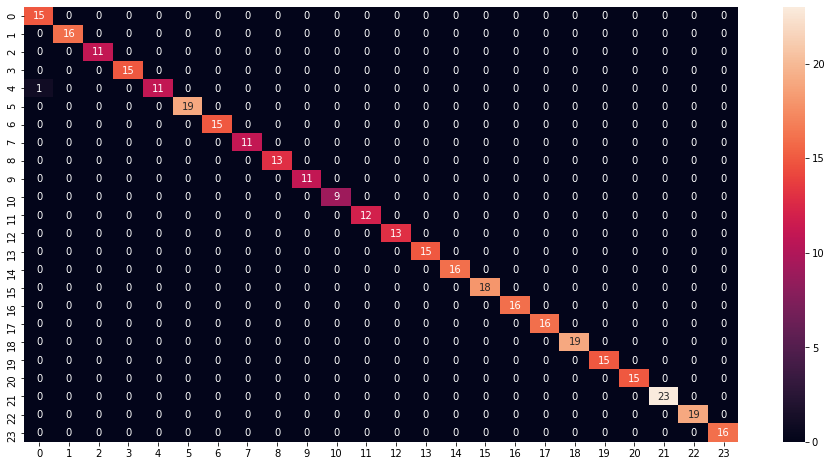

In [37]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns
plt.rcParams["figure.figsize"]=[16,8]
y_pred = model_4.predict(x_val)
sns.heatmap(confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)), annot=True)

In [38]:
model_5 = Sequential()
n_filtros = 8
model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))

model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',))

model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))

model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))

model_5.add(Conv2D(filters=n_filtros,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

model_5.add(MaxPooling2D(pool_size=(2, 2)))


model_5.add(Flatten()) 
model_5.add(Dense(units=110, activation='tanh'))
model_5.add(Dense(units=24, activation='softmax'))

my_callbacks = [History(), # Returns validation and training loss
EarlyStopping(patience=10,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                 restore_best_weights=True)]

model_5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
# train and save results
history_5 = model_5.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)
##histories_5.append(history_5)

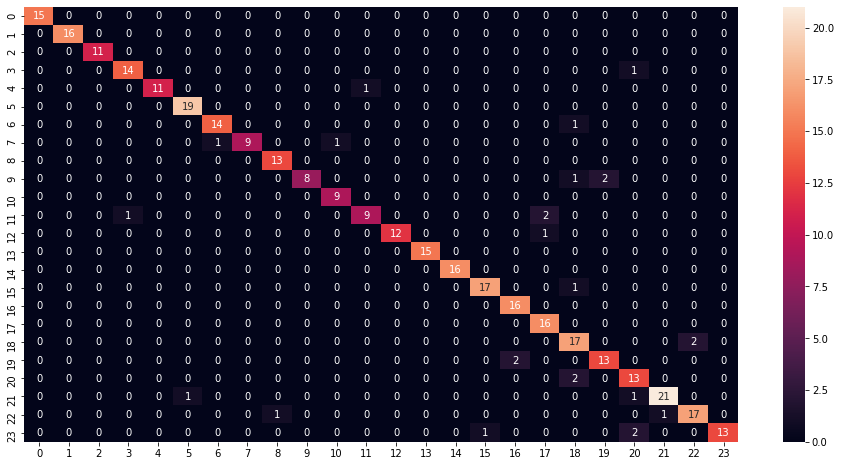

In [39]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns
plt.rcParams["figure.figsize"]=[16,8]
y_pred = model_5.predict(x_val)
sns.heatmap(confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)), annot=True)

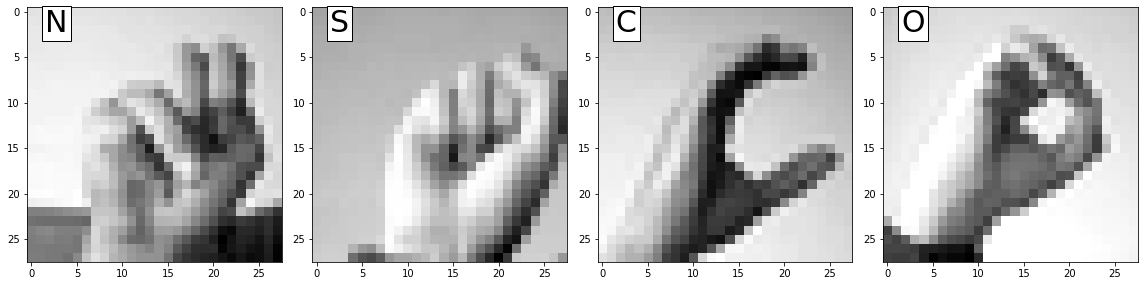

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[16,4]
letters=["N","S","C","O"]
fig, axs = plt.subplots(1,4)
#print(list(enumerate(axs)))
# n-s, c-o
for i,let in enumerate([13,18,2,14]):
  axs[i].imshow(x_tmp[np.where(y_tmp[:,0]==let)[0][0],:,:,0], cmap = "gray")
  axs[i].text(1.5, 2.2, letters[i], bbox={'facecolor': 'white', 'pad': 3},fontsize=30)
plt.tight_layout()
plt.show()

## 2.j Batch Normalization
Una manera propuesta de mejorar los desempeños de las redes en general, que funciona bastante bien en tareas de reconocimiento de imagenes es _Batch Normalization_. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ luego de cada capa de _MaxPool_. Comente sus resultados. 

**Preguntas**

Segun su conocimiento teórico y investigación, ¿Qué realiza _Batch Normalization_ en términos matemáticos? En términos de aprendizaje, ¿qué evita la utilización de _Batch Normalization_?
**Respuestas:** En términos matemáticos, batch normalization estandariza los valores de cada neurona después de aplicar un max pooling, dejando los valores con media 0 y una varianza específica. Esto se realiza, ya que, para redes del tipo convolucional las magnitudes de los valores pueden variar considerablemente entre una capa y otra e inclusive entre neuronas de una misma capa, lo cual, podría obstaculizar la convergencia de la red. En términos del aprendizaje, estamos evitando que ciertas neuronas tomen valores de varias magnitudes más altas que las otras tomando así un gran peso en la clasificación y provocando overfitting.

¿Mejoran los desempeños de la red agregando _Batch Normalization_? ¿Existe diferencias entre una capa de _batch normalization_ justo antes o justo despues de una capa de _MaxPool_ en términos numéricos? ¿Opina lo mismo en términos de aprendizaje? Discuta. 

**Respuestas:** No mejoran. En términos numéricos si hay diferencia, ya que, el BN antes del MaxPool utilizaría la media y varianza calculada con todos los valores, en cambio, después de MaxPool se estará calculando la media y varianza solo con los valores más altos. En términos de aprendizaje podría haber diferencias si es que las magnitudes de los valores más altos sean considerablemente mayores a las de los valores más pequeños, esto ya que, la media calculada antes de MaxPool tendería a ser más pequeña debido a los valores más pequeños, en cambio si se aplica después de MaxPool la media será considerablemente más alta, logrando así, reducir en mayor medida la variación de los datos. Esto último podría contraponerse debido a la disminución de la varianza después de la capa de MaxPool.

In [41]:
from keras.layers.normalization import BatchNormalization
model.add(BatchNormalization())

model_6 = Sequential()
n_filtros = 128
model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu',
                  input_shape=x_tr.shape[1:]))

model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu',))

model_6.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu',
                  input_shape=x_tr.shape[1:]))

model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))

model_6.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu',
                  input_shape=x_tr.shape[1:]))

model_6.add(Conv2D(filters=n_filtros,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))

model_6.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model_6.add(Flatten()) 
model_6.add(Dense(units=110, activation='tanh'))
model_6.add(Dense(units=24, activation='softmax'))

my_callbacks = [History(), # Returns validation and training loss
EarlyStopping(patience=10,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs,keep it at 100 it's only to show u
                                  restore_best_weights=True)]

model_6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
# train and save results
history_6 = model_6.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val),verbose=0,callbacks=my_callbacks)

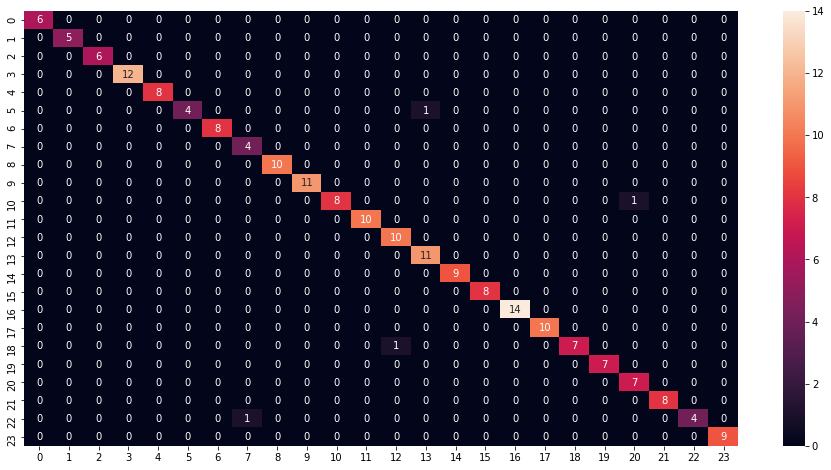

In [42]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns
plt.rcParams["figure.figsize"]=[16,8]
y_pred = model_6.predict(x_tst)
sns.heatmap(confusion_matrix(np.argmax(y_tst, axis=1), np.argmax(y_pred, axis=1)), annot=True)